In [1]:
#actualise automatiquement les modules importés
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch

from advi2 import ADVI2
from gmm import GMM

[0.11376918 0.88623082]
[-10  10]
[[1.73324064 1.01646478]
 [0.39385538 1.40580052]]


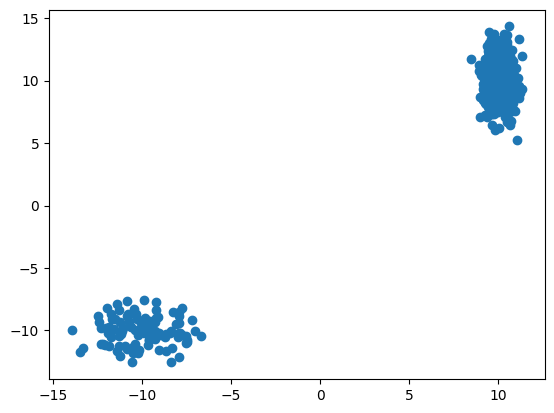

In [12]:
import sklearn
# note that in the function below D should be greater then K
def build_toy_dataset2(N, D, K):
    x_train = np.zeros([N, D])
    mu = np.array([-10,10])
    sigma = np.abs(np.random.randn(K,D))
    theta = np.abs(np.random.randn(K)) 
    theta = theta/theta.sum()
    print(theta)
    print(mu)
    print(sigma)
    for n in range(N):
        id = np.random.choice(K,1,p=theta)[0]
        x_train[n] = np.random.normal(mu[id], sigma[id])
    return x_train.astype(np.float32,copy=False).transpose()


#ed.set_seed(142)

N = 1000  # number of data points
D = 2  # data dimensionality
K = 2  # latent dimensionality

# DATA

x_train = build_toy_dataset2(N, D, K)
x_train = torch.tensor(x_train).permute(1,0)
plt.plot(x_train[:,0],x_train[:, 1],'o')

Fitting...: 100%|██████████| 50/50 [01:11<00:00,  1.43s/it]


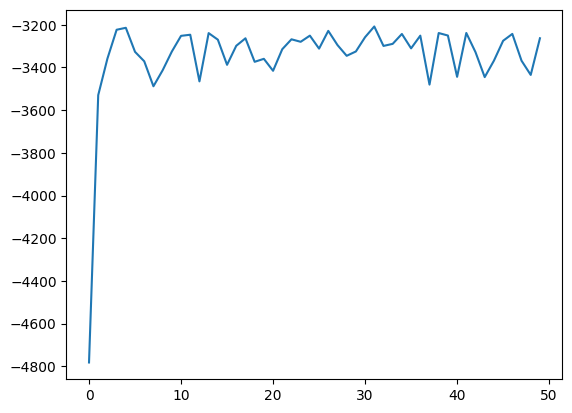

In [13]:
#actualise automatiquement les modules importés
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch

from advi2 import ADVI2
from gmm import GMM

gmm_K = 2
model = GMM(D, gmm_K, alpha_0=1000)
param_keys = model.named_params
param_dims = model.dim_parameters
key_pos = model.key_pos
advi = ADVI2(model, 1, batch_size=10, lr=0.1, mode='meanfield', num_epochs=50)

%matplotlib inline
advi.fit(x_train, method="Adam", plotting=True)

p: tensor([0.6385, 0.3615])
mean: tensor([[10.0544, 10.2788],
        [-8.4628, -9.2501]])
sigma: tensor([[0.3710, 1.3497],
        [1.7745, 2.1343]])


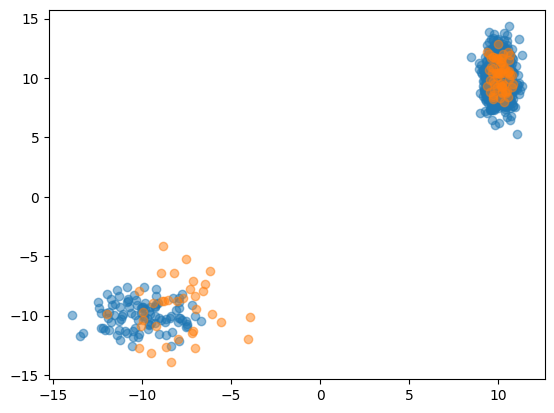

In [14]:
zeta_p = advi.model_params.vparams[0, :gmm_K].detach()
mean = advi.model_params.vparams[0, gmm_K:gmm_K + gmm_K*D].view(gmm_K, D).detach()
log_sigma = advi.model_params.vparams[0, gmm_K + gmm_K*D:gmm_K + 2*gmm_K*D].view(gmm_K, D).detach()
exp_sum = zeta_p.exp().sum() 
p = zeta_p.exp() / exp_sum
sigma = torch.exp(log_sigma)

print(f"p: {p}")
print(f"mean: {mean}")
print(f"sigma: {sigma}")

samples = model.rsample(100, p, mean, sigma)

plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.5)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

In [5]:
from gmm import GaussianMixtureModel
model = GaussianMixtureModel(D, gmm_K)

ImportError: cannot import name 'GaussianMixtureModel' from 'gmm' (c:\Users\quent\ecole\3A\GRM\ADVI\gmm.py)

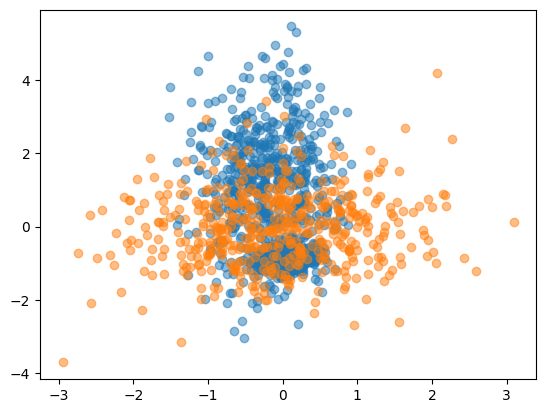

In [ ]:
p = advi.model_params.vparams[0, :gmm_K].detach()
mean = advi.model_params.vparams[0, gmm_K:gmm_K + D*gmm_K].detach()
log_sigma = advi.model_params.vparams[0, D + D*gmm_K:D + 2*D*gmm_K].detach()
sum = p.exp().sum()
p = p.exp()/sum
samples = model.rsample(500, p, mean, torch.exp(log_sigma))

plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.5)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

In [ ]:
import torch
from gmm import GaussianMixtureModel
weights = torch.Tensor([0.25, 0.25, 0.25, 0.25])
means = torch.Tensor([[-5, 4], [5, -4], [-5, 4], [5, -4]])
sigmas = torch.Tensor([[0.0001,0.0001], [0.0001,0.0001], [0.00001,0.00001], [0.00001,0.00001]])
x = torch.Tensor([[-5, 4]])
gmm = GaussianMixtureModel(weights, means, sigmas)
gmm.log_prob(x)

tensor(19.8116)

In [ ]:
from torch.distributions import Normal, Dirichlet, LogNormal

A = Normal(loc=0, scale=1).log_prob(torch.Tensor([[-10.,-10.],[10.,10.]])).sum()
A += Dirichlet(concentration=torch.ones(2)*100).log_prob(torch.Tensor([0.5,0.5]))
A += LogNormal(loc=0, scale=1).log_prob(torch.Tensor([[1.,1.],[1.,1.]])).sum()
print(A)

tensor(-204.9294)


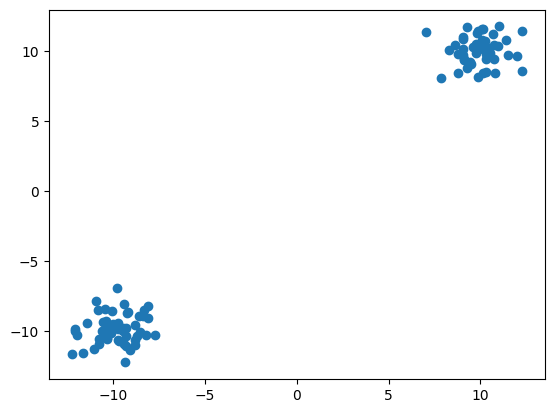

In [ ]:
from gmm import GMM
import numpy as np
import matplotlib.pyplot as plt

D = 2
gmm_K = 4
model = GMM(D, gmm_K)
points = model.rsample(100, p=torch.tensor([0.5,0.5]), mu=torch.tensor([[-10.,-10.],[10.,10.]]), sigma=torch.tensor([[1.,1.],[1.,1.]]))

plt.scatter(points[:, 0], points[:, 1])
